<a href="https://colab.research.google.com/github/sid2610/HPE_Goal/blob/main/BallTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import pickle

TensorFlow 1.x selected.


In [2]:
%pip install azure-storage-blob

     |████████████████████████████████| 348kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 17.7MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 133kB 30.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 


In [3]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

try:
    print("Azure Blob storage v" + __version__ + " - Python quickstart sample")
    # Quick start code goes here
except Exception as ex:
    print('Exception:')
    print(ex)

Azure Blob storage v12.7.1 - Python quickstart sample


In [4]:
os.mkdir("./videos")

In [5]:
os.mkdir("./annots")

In [6]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "videos"

In [7]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [8]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [9]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".mp4"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./videos/Cam-" + str(i+1) + ".mp4"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [10]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "annots"

In [11]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [12]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [13]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".csv"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./annots/Cam-" + str(i+1) + ".csv"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [14]:
import matplotlib.pyplot as plt
import imageio
import imutils
import pandas as pd
import cv2
import random

In [15]:
cam = pd.DataFrame()
for i in range(4):
    d = pd.read_csv('./annots/Cam-' + str(i+1) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    d = d.drop(2)
    cam = pd.concat([cam,d])
for i in range(2):
    d = pd.read_csv('./annots/Cam-' + str(i+5) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    cam = pd.concat([cam,d])

In [16]:
cam = cam.reset_index()

In [17]:
cam

,index,Frame No.,x,y
0,3,4,-,-
1,4,5,-,-
2,5,6,-,-
3,6,7,-,-
4,7,8,-,-
...,...,...,...,...
17979,2995,2996,-,-
17980,2996,2997,-,-
17981,2997,2998,-,-
17982,2998,2999,-,-


In [18]:
cam = cam.rename(columns={"Frame No.":"f"," x":"x"," y":"y"})

In [19]:
for i in range(17984):
    if cam.x[i]==' -':
        cam.x[i] = -1
        cam.y[i] = -1
    cam.x[i] = int(cam.x[i])
    cam.y[i] = int(cam.y[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

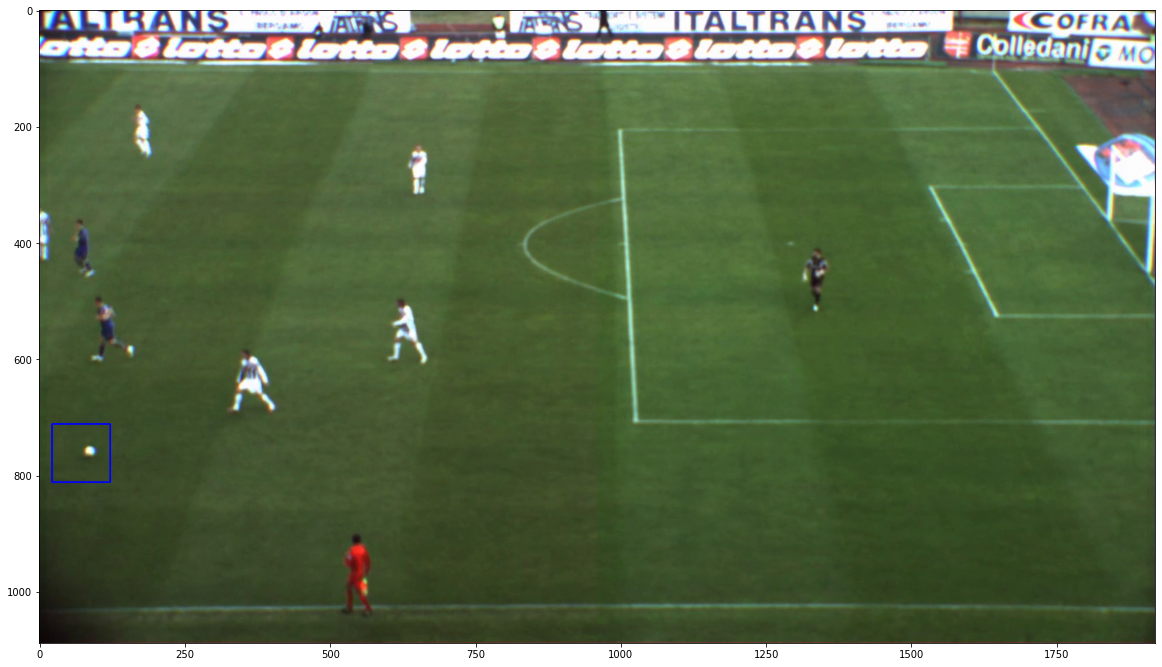

In [20]:
vid = imageio.get_reader('./videos/Cam-1.mp4')
i = 120
frame = vid.get_data(i)
clone = frame.copy()
x = cam.x[i]
y = cam.y[i]
cv2.rectangle(clone, (x-50,y-50), (x+50,y+50), (0,0,255), 2)
plt.figure(figsize=(20,20))
plt.imshow(clone)

In [21]:
i = 0
while cam.x[i] == -1:
    i += 1
i

116

In [22]:
def extract_frame(frame, x, y, h, w):
    hh = int(h/2)
    ww = int(w/2)
    if x>=ww and x<(frame.shape[1]-ww):
        lx = ww
    elif x<ww:
        lx = x
    else:
        lx = w-(frame.shape[1]-x)
    if y>=hh and y<(frame.shape[0]-hh):
        ly = hh
    elif y<hh:
        ly = y
    else:
        ly = h-(frame.shape[0]-y)
    return frame[y-ly:y+h-ly, x-lx:x+w-lx]

In [23]:
import pickle

In [24]:
with open ('/content/drive/MyDrive/Datasets/ISSIA/data/tx', 'rb') as fp:
    tx = pickle.load(fp)
with open ('/content/drive/MyDrive/Datasets/ISSIA/data/ty', 'rb') as fp:
    ty = pickle.load(fp)

In [25]:
len(tx)

10162

In [26]:
'''n = 5
m = 12
for i in range(12000, 17983):
    if i%100 == 0:
        print(i, len(tx))
    if cam.x[i] != -1:
        vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
        frame = vid.get_data(m)
        tx.append(extract_frame(frame, cam.x[i], cam.y[i]))
        ty.append(1)
        rx = random.randrange(0,1920)
        ry = random.randrange(0,1080)
        tx.append(extract_frame(frame, rx, ry))
        ty.append(0)
    m+=1
    if cam.f[i]>cam.f[i+1]:
        n += 1
        m = 0
i += 1
if cam.x[i] != -1:
    vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
    frame = vid.get_data(m)
print(i)'''

"n = 5\nm = 12\nfor i in range(12000, 17983):\n    if i%100 == 0:\n        print(i, len(tx))\n    if cam.x[i] != -1:\n        vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')\n        frame = vid.get_data(m)\n        tx.append(extract_frame(frame, cam.x[i], cam.y[i]))\n        ty.append(1)\n        rx = random.randrange(0,1920)\n        ry = random.randrange(0,1080)\n        tx.append(extract_frame(frame, rx, ry))\n        ty.append(0)\n    m+=1\n    if cam.f[i]>cam.f[i+1]:\n        n += 1\n        m = 0\ni += 1\nif cam.x[i] != -1:\n    vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')\n    frame = vid.get_data(m)\nprint(i)"

In [27]:
len(tx)

10162

In [28]:
'''os.mkdir('./data_1')
with open('./data_1/tx', 'wb') as fp:
    pickle.dump(tx,fp)
with open('./data_1/ty', 'wb') as fp:
    pickle.dump(ty,fp)
import shutil
shutil.make_archive('data_1', 'zip', './data_1')'''

"os.mkdir('./data_1')\nwith open('./data_1/tx', 'wb') as fp:\n    pickle.dump(tx,fp)\nwith open('./data_1/ty', 'wb') as fp:\n    pickle.dump(ty,fp)\nimport shutil\nshutil.make_archive('data_1', 'zip', './data_1')"

In [29]:
len(ty)

10162

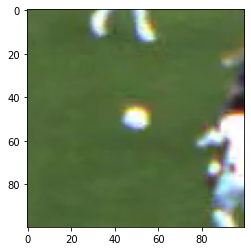

In [30]:
plt.imshow(tx[3600])

In [31]:
trainx = np.asarray(tx)
trainy = np.asarray(ty)

In [32]:
trainx.shape

(10162, 100, 100, 3)

In [33]:
trainy.shape

(10162,)

In [34]:
trainy = np.expand_dims(trainy, axis=1)

In [35]:
trainy.shape

(10162, 1)

In [36]:
from scipy.ndimage.filters import gaussian_filter

blur = gaussian_filter(trainx[0], sigma=0.9)

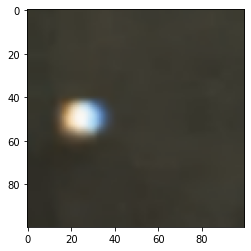

In [37]:
plt.imshow(blur)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

In [40]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(100,100,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step


In [41]:
model = Sequential()

In [42]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
trainx_1 = vgg.predict(trainx)

In [44]:
trainx_1.shape

(10162, 3, 3, 512)

In [45]:
(x_train, x_val, y_train, y_val) = train_test_split(trainx_1, trainy, test_size = 0.3)

In [46]:
x_train.shape

(7113, 3, 3, 512)

In [47]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7113 samples, validate on 3049 samples
Epoch 1/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.3998 - acc: 0.9083 - val_loss: 0.1579 - val_acc: 0.9462
Epoch 2/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.1633 - acc: 0.9577 - val_loss: 0.2298 - val_acc: 0.9606
Epoch 3/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.1813 - acc: 0.9661 - val_loss: 0.1576 - val_acc: 0.9564
Epoch 4/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.1064 - acc: 0.9729 - val_loss: 0.3134 - val_acc: 0.9419
Epoch 5/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.1607 - acc: 0.9767 - val_loss: 0.5561 - val_acc: 0.9521
Epoch 6/10
7113/7113 [==============================] - 14s 2ms/sample - loss: 0.1221 - acc: 0.9772 - val_loss: 0.3900 - val_acc: 0.9587
Epoch 7/10
7113/7113 [==============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4719616   
_________________________________________________________________
dense_1 (Dense)              multiple                  131200    
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 4,852,897
Trainable params: 4,852,897
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.save_weights('./vgg_dense.h5', overwrite=True, save_format='h5')

In [52]:
model.load_weights('./vgg_dense.h5')

In [55]:
def sliding_window(img, win, step):
    for y in range(0,img.shape[0]-win[1],step):
        for x in range(0,img.shape[1]-win[0],step):
            yield (x,y,img[y:y+win[1],x:x+win[0]])

In [ ]:
def pyramid(img, scale, minsize):
    yield img
    print(img.shape)
    while True:
        w = int(img.shape[1]/scale)
        img = imutils.resize(img, width=w)
        if img.shape[0]<minsize[1] or img.shape[1]<minsize[0]:
            break
        yield img
        print(img.shape)

In [57]:
win_size = (100,100)
step = 20

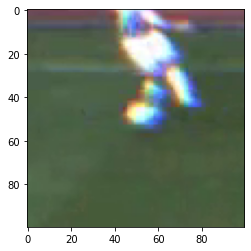

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

array([1])

In [ ]:
t = vgg.predict(x_test)

In [ ]:
t.shape

(2033, 3, 3, 512)

In [ ]:
y_t = model.predict(t)

In [ ]:
np.average(np.absolute(y_test-y_t))

0.012189146719480815

In [ ]:
test = plt.imread('sample.png')

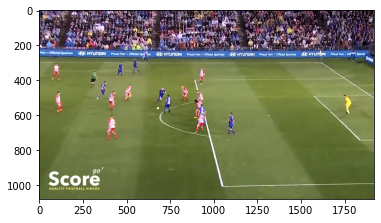

In [ ]:
plt.imshow(test)

In [ ]:
test.shape

(1080, 1920, 3)

In [ ]:
frame_1 = frame.astype(np.float)/255
for y in range(test.shape[0]):
    for x in range(test.shape[1]):
        if (test[y][x][1]<(np.max([test[y][x][0],test[y][x][2]]))):
            frame_1[y][x] *= 0

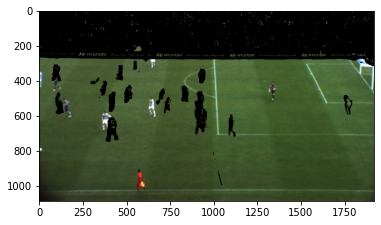

In [ ]:
plt.imshow(frame_1)

In [ ]:
v = 0
for i in range(frame_1.shape[0]):
    if (np.sum(frame_1[i,:,1])/frame_1.shape[1])>0.2:
        v = i
        break

In [ ]:
test = test[v:]

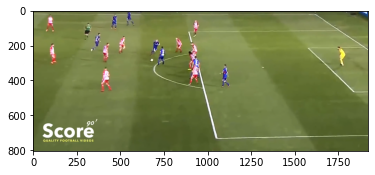

In [ ]:
plt.imshow(test)

In [ ]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 20
0 40
0 60
0 80
0 100
0 120
0 140
0 160
0 180
0 200
0 220
0 240
0 260
0 280
0 300
0 320
0 340
0 360
0 380
0 400
0 420
0 440
0 460
0 480
0 500
0 520
0 540
0 560
0 580
0 600
0 620
0 640
0 660
0 680
0 700


In [ ]:
np.max(preds)

0.98043126

In [ ]:
len(locs)

3276

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


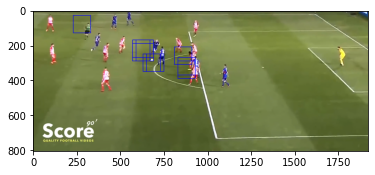

In [ ]:
clone = test.copy()
for i in range(len(preds)):
    if preds[i]>0.9:
        cv2.rectangle(clone, (locs[i][0]-50,locs[i][1]-50), (locs[i][0]+50,locs[i][1]+50), (0,0,255), 2)
plt.imshow(clone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


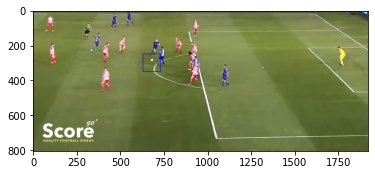

In [ ]:
clone = test.copy()
i = np.argmax(preds)
cv2.rectangle(clone, (locs[i][0]-50,locs[i][1]-50), (locs[i][0]+50,locs[i][1]+50), (0,0,255), 2)
plt.imshow(clone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


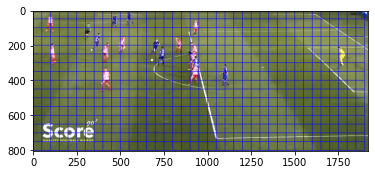

In [ ]:
clone = test.copy()
for i in range(len(preds)):
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

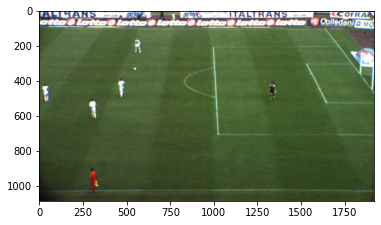

In [75]:
test = vid.get_data(250)
plt.imshow(test)

In [58]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 20
0 40
0 60
0 80
0 100
0 120
0 140
0 160
0 180
0 200
0 220
0 240
0 260
0 280
0 300
0 320
0 340
0 360
0 380
0 400
0 420
0 440
0 460
0 480
0 500
0 520
0 540
0 560
0 580
0 600
0 620
0 640
0 660
0 680
0 700
0 720
0 740
0 760
0 780
0 800
0 820
0 840
0 860
0 880
0 900
0 920
0 940
0 960
0 980


In [59]:
np.argmax(preds)

73

In [61]:
preds[73]

array([[1.]], dtype=float32)

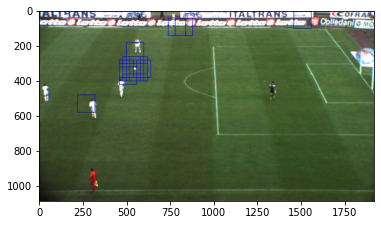

In [65]:
clone = test.copy()
for i in range(len(preds)):
    if preds[i]==np.max(preds):
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

In [86]:
frame_1 = test.astype(np.float)/255
for y in range(test.shape[0]):
    for x in range(test.shape[1]):
        if (test[y][x][1]<(20+np.max([test[y][x][0],test[y][x][2]]))):
            frame_1[y][x] *= 0

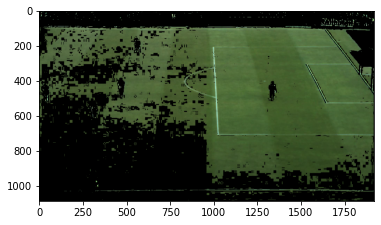

In [87]:
plt.imshow(frame_1)

In [88]:
v = 0
for i in range(frame_1.shape[0]):
    if (np.sum(frame_1[i,:,1])/frame_1.shape[1])>0.2:
        v = i
        break

In [89]:
test_1 = test[v:]

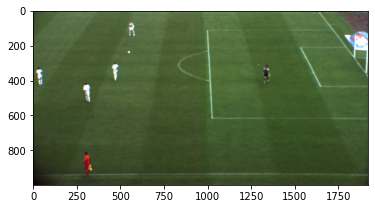

In [90]:
plt.imshow(test_1)

In [91]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test_1, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 20
0 40
0 60
0 80
0 100
0 120
0 140
0 160
0 180
0 200
0 220
0 240
0 260
0 280
0 300
0 320
0 340
0 360
0 380
0 400
0 420
0 440
0 460
0 480
0 500
0 520
0 540
0 560
0 580
0 600
0 620
0 640
0 660
0 680
0 700
0 720
0 740
0 760
0 780
0 800
0 820
0 840
0 860
0 880


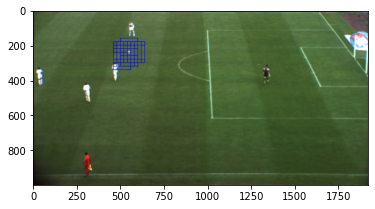

In [94]:
clone = test_1.copy()
for i in range(len(preds)):
    if preds[i]==np.max(preds):
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)